In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import incision_detection_mmdet
import numpy as np

NOTE! Installing ujson may make loading annotations faster.


2023-10-05 13:44:56,508 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - mmdet.version=2.25.0
2023-10-05 13:44:56,509 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - 11.7
2023-10-05 13:44:56,509 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - GCC 9.4


1.12.0a0+8a1a93a True


In [2]:
!pwd

/webapps/piglegsurgery/piglegcv


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Thu Oct  5 13:44:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   40C    P8     9W / 250W |    259MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
torch.__version__

'1.12.0a0+8a1a93a'

In [6]:
Path("/root/.cache/torch/hub/checkpoints/").exists()

True

In [7]:
!ls /root/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


# Run incision crop

In [8]:
# find the video
i = -5
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*knopf*.mp4"))
print(len(img_pths))
img_pths[i]

77


PosixPath('../piglegsurgeryweb/media/upload/20230222-130406_2023.02.21-B-Hilbert-David-Einzelknopfnaht am schweinefuß_8f0e178621d7e97b98a4420da99fb6fedd41bd6c/2023.02.21-B-Hilbert-David-Einzelknopfnaht_am_schweinefuß.mp4')

2049


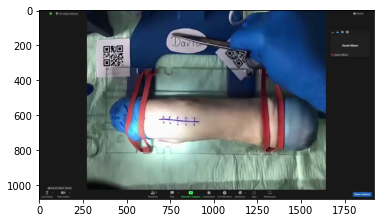

In [9]:
# get the frame
img = pigleg_cv.get_frame_to_process(img_pths[i])
# opencv has inverted color channels
plt.imshow(img[:,:,::-1])


2023-10-05 13:44:58,632 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-10-05 13:44:58,636 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(1080, 1920, 3), max(img)=255


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-10-05 13:45:02,240 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-10-05 13:45:02.242 | DEBUG    | tools:save_json:9 - Writing 'delete/meta.json'
2023-10-05 13:45:02.243 | DEBUG    | tools:save_json:18 - old keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']
2023-10-05 13:45:02.243 | DEBUG    | tools:save_json:20 - updated keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']


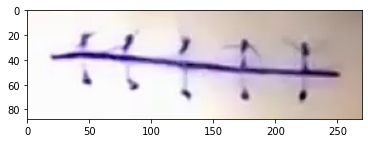

In [10]:
# find the incision
imgs, bboxes = incision_detection_mmdet.run_incision_detection(img, "./delete/")
plt.imshow(imgs[0][:,:,::-1])

In [11]:
# pip install mmcv-full

# Run whole image processing

In [12]:
# find the video
i = 41
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*.jpg"))
print(len(img_pths))
print(img_pths[i])
pigleg_cv.run_image_processing(str(img_pths[i]),  "./del_test_image_output/")

2023-10-05 13:45:02.486 | DEBUG    | pigleg_cv:run_image_processing:139 - Running image processing...


393
../piglegsurgeryweb/media/upload/20211104-131923_2021.11.3-B-Volkers-Einzelknopfnaht Schweinefuß_c845cd8ce872c5f3ef48b5baf30f3abc0198578d/preview.jpg


/opt/conda/lib/python3.8/site-packages/torch/functional.py:598: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2323.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2023-10-05 13:45:03.004 | DEBUG    | run_qr:bbox_info_extraction_from_frame:68 - qr code text = 'QR scale pigleg'
2023-10-05 13:45:03.005 | DEBUG    | run_qr:bbox_info_extraction_from_frame:122 - {'bbox_scene_area': [3.9252912998199463,
                     0.0,
                     776.0000610351562,
                     743.8726806640625,
                     0.40557995438575745],
 'box': [[666, 232], [685, 303], [758, 286], [736, 217]],
 'is_detected': True,
 'pix_size': 0.00036735543893028495,
 'pix_size_method': 'QR',
 'pix_size_single_frame_detector_m': 0.0003556944896129159,
 'qr_scissors_frame_detected': False,
 'qr_size': 0.027,
 'size_by_scene': 0.0003

Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-10-05 13:45:03,739 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-10-05 13:45:03.741 | DEBUG    | tools:save_json:9 - Writing 'del_test_image_output/meta.json'
2023-10-05 13:45:03.742 | DEBUG    | tools:save_json:18 - old keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']
2023-10-05 13:45:03.742 | DEBUG    | tools:save_json:20 - updated keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']
2023-10-05 13:45:03.743 | DEBUG    | run_perpendicular:main_perpendicular:279 - len(imgs)=1
2023-10-05 13:45:03.769 | DEBUG    | tools:save_json:9 - Writing './del_test_image_output/perpendicular_0.json'
2023-10-05 13:45:03.770 | DEBUG    | tools:save_json:20 - updated keys: ['intersections', 'alphas']


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2023-10-05 13:45:04.992 | DEBUG    | tools:save_json:9 - Writing './del_test_image_output//stitch_detection_0.json'
2023-10-05 13:45:04.993 | DEBUG    | tools:save_json:20 - updated keys: ['stitch_labels', 'stitch_bboxes']
2023-10-05 13:45:04,994 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - number of detected stitches = 4
2023-10-05 13:45:04,994 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - Stitch detection finished, boxes in: ./del_test_image_output//stitch_detection_0.json
2023-10-05 13:45:05,062 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared upper line: 0.637
2023-10-05 13:45:05,063 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - 

# Run whole video processing

In [13]:
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/test*.mp4"))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

2023-10-05 13:45:14.965 | DEBUG    | pigleg_cv:do_computer_vision:41 - CV processing started on ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4, outputdir=./del_test_video_output/
2023-10-05 13:45:14.966 | DEBUG    | pigleg_cv:run_video_processing2:98 - Running video processing...
2023-10-05 13:45:14.967 | DEBUG    | run_qr:main_qr:129 - looking for qr code...
2023-10-05 13:45:15.101 | DEBUG    | run_qr:main_qr:160 - frame=0


Fusing layers... 
IDetect.fuse


2023-10-05 13:45:15.443 | DEBUG    | run_qr:bbox_info_extraction_from_frame:122 - {'bbox_scene_area': [0.0,
                     1.0059301853179932,
                     857.5050659179688,
                     532.2636108398438,
                     0.4095137119293213],
 'box': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 4.224783081393878e-05,
 'qr_scissors_frame_detected': False,
 'qr_size': 0.027,
 'size_by_scene': 0.0003125,
 'text': None}
2023-10-05 13:45:15.447 | DEBUG    | run_qr:main_qr:160 - frame=10
2023-10-05 13:45:15.771 | DEBUG    | run_qr:bbox_info_extraction_from_frame:122 - {'bbox_scene_area': [0.0,
                     3.1047585010528564,
                     843.4805908203125,
                     540.0,
                     0.4051257371902466],
 'box': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 4.2684292

prepared to save to file del_test_video_output/meta.json
185


2023-10-05 13:45:22.611 | DEBUG    | run_qr:bbox_info_extraction_from_frame:122 - {'bbox_scene_area': [0.0,
                     2.312798023223877,
                     923.2431640625,
                     536.6835327148438,
                     0.3898843824863434],
 'box': [],
 'is_detected': False,
 'pix_size': 1.0,
 'pix_size_method': 'video size estimation',
 'pix_size_single_frame_detector_m': 4.308236993976474e-05,
 'qr_scissors_frame_detected': False,
 'qr_size': 0.027,
 'size_by_scene': 0.0003125,
 'text': None}
2023-10-05 13:45:22.614 | DEBUG    | run_perpendicular:main_perpendicular:269 - main_perpendicular...
2023-10-05 13:45:22.685 | DEBUG    | run_perpendicular:main_perpendicular:277 - incision detection ...
2023-10-05 13:45:22,686 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-10-05 13:45:22,688 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(540, 960, 3), max(img)=255


Fusing layers... 
IDetect.fuse
185
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-10-05 13:45:23,378 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-10-05 13:45:23.380 | DEBUG    | tools:save_json:9 - Writing 'del_test_video_output/meta.json'
2023-10-05 13:45:23.381 | DEBUG    | tools:save_json:18 - old keys: ['qr_data', 'pixelsize_m_by_incision_size', 'incision_bboxes', 'stitch_scores']
2023-10-05 13:45:23.381 | DEBUG    | tools:save_json:20 - updated keys: ['qr_data', 'pixelsize_m_by_incision_size', 'incision_bboxes', 'stitch_scores']
2023-10-05 13:45:23.383 | DEBUG    | run_perpendicular:main_perpendicular:279 - len(imgs)=1
2023-10-05 13:45:23.410 | DEBUG    | tools:save_json:9 - Writing './del_test_video_output/perpendicular_0.json'
2023-10-05 13:45:23.411 | DEBUG    | tools:save_json:18 - old keys: ['intersections', 'alphas']
2023-10-05 13:45:23.412 | DEBUG    | tools:save_json:20 - updated keys: ['intersections', 'alphas']


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth


2023-10-05 13:45:24.171 | DEBUG    | tools:save_json:9 - Writing './del_test_video_output//stitch_detection_0.json'
2023-10-05 13:45:24.172 | DEBUG    | tools:save_json:18 - old keys: ['stitch_labels', 'stitch_bboxes']
2023-10-05 13:45:24.173 | DEBUG    | tools:save_json:20 - updated keys: ['stitch_labels', 'stitch_bboxes']
2023-10-05 13:45:24,173 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - number of detected stitches = 3
2023-10-05 13:45:24,174 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - Stitch detection finished, boxes in: ./del_test_video_output//stitch_detection_0.json
2023-10-05 13:45:24,380 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared upper line: 0.095
2023-10-05 13:45:24,380 - /webapps/piglegsurgery/piglegcv/stitch_detection_mmdet.py - DEBUG - R-squared lower line: 0.138
2023-10-05 13:45:24.521 | DEBUG    | tools:save_json:9 - Writing './del_test_video_output//meta.json'
2023-10-05 13:45:24.52

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2023-10-05 13:45:52.232 | DEBUG    | pigleg_cv:run_video_processing2:118 - Tracker finished in 27.708836555480957s.
2023-10-05 13:45:52.233 | DEBUG    | pigleg_cv:run_video_processing2:125 - filename=../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4, outputdir=./del_test_video_output/
2023-10-05 13:45:52.234 | DEBUG    | pigleg_cv:run_video_processing2:126 - filename=True, outputdir=True
2023-10-05 13:45:52.241 | DEBUG    | run_report:main_report:669 - size_input_video: [960, 540], size_output_video: [1301, 420], size_output_img: [746, 420], resize_factor: 0.7777777777777778
2023-10-05 13:45:52.244 | DEBUG    | run_report:main_report:688 - Sort data N=
/webapps/piglegsurgery/piglegcv/run_report.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mus

11705.022043198347
b Needle holder
g Scissors


2023-10-05 13:45:53.350 | DEBUG    | run_report:main_report:752 - Frame 10 processed!
2023-10-05 13:45:54.311 | DEBUG    | run_report:main_report:752 - Frame 20 processed!
2023-10-05 13:45:55.262 | DEBUG    | run_report:main_report:752 - Frame 30 processed!
2023-10-05 13:45:56.211 | DEBUG    | run_report:main_report:752 - Frame 40 processed!
2023-10-05 13:45:57.152 | DEBUG    | run_report:main_report:752 - Frame 50 processed!
2023-10-05 13:45:58.099 | DEBUG    | run_report:main_report:752 - Frame 60 processed!
2023-10-05 13:45:59.028 | DEBUG    | run_report:main_report:752 - Frame 70 processed!
2023-10-05 13:45:59.966 | DEBUG    | run_report:main_report:752 - Frame 80 processed!
2023-10-05 13:46:00.901 | DEBUG    | run_report:main_report:752 - Frame 90 processed!
2023-10-05 13:46:01.847 | DEBUG    | run_report:main_report:752 - Frame 100 processed!
2023-10-05 13:46:02.786 | DEBUG    | run_report:main_report:752 - Frame 110 processed!
2023-10-05 13:46:03.716 | DEBUG    | run_report:main

bbox
[283.20086669921875, 227.19700622558594, 493.01824951171875, 437.01438903808594, 0.9942836165428162]


2023-10-05 13:46:11.803 | DEBUG    | run_report:create_pdf_report:333 - main_report: No data to report
2023-10-05 13:46:11.811 | DEBUG    | run_report:create_heatmap_report_plt:164 - points.shape=(0,)
2023-10-05 13:46:11.812 | WARNING  | run_report:create_heatmap_report_plt:167 - No points found for heatmap
2023-10-05 13:46:12.040 | DEBUG    | run_report:create_pdf_report:294 - main_report: figures ./del_test_video_output/graph_2c_trajectory.jpg is saved
2023-10-05 13:46:12.210 | DEBUG    | run_report:create_pdf_report:323 - main_report: figures ./del_test_video_output/fig_2a_scissors_graph.jpg is saved
2023-10-05 13:46:12.218 | DEBUG    | run_report:create_heatmap_report_plt:164 - points.shape=(120, 2)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
2023-10-05 13:46:12.459 | DEBUG    | run_report:create_pdf_report:333 - main_report: No data to report
2023-10-05 13:46:12

main_report: Video file ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4 is processed!


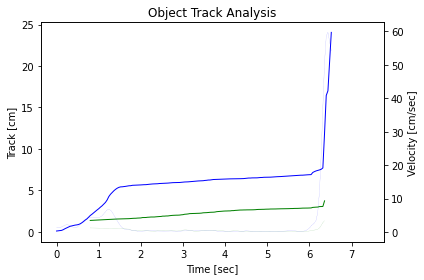

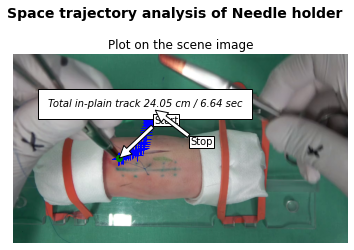

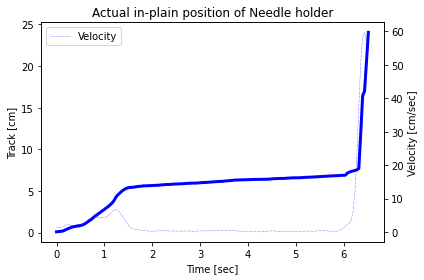

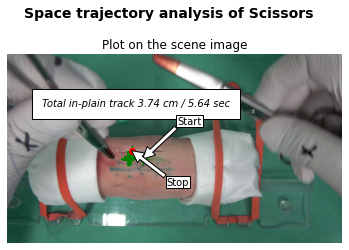

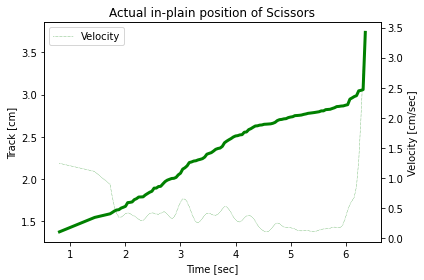

In [14]:
pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)

## Run just `main_report()`

You can repeat to do the main report afer the `do_computer_vision()` is done firsttime

2023-10-05 13:46:13.176 | DEBUG    | run_report:main_report:669 - size_input_video: [960, 540], size_output_video: [1301, 420], size_output_img: [746, 420], resize_factor: 0.7777777777777778
2023-10-05 13:46:13.177 | DEBUG    | run_report:main_report:688 - Sort data N=
/webapps/piglegsurgery/piglegcv/run_report.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  frame_ids_list = np.asarray(frame_ids).tolist()
2023-10-05 13:46:13.185 | DEBUG    | tools:save_json:9 - Writing './del_test_video_output//tracks_points.json'
2023-10-05 13:46:13.185 | DEBUG    | tools:save_json:20 - updated keys: ['frame_ids', 'data_pixels_0', 'data_pixels_1', 'data_pixels_2', 'data_pixels_3']
2023-10-05 13:46:13.247 | DEBUG    | run_report:create_video_report_figure:539 - main_video_report

11705.022043198347
b Needle holder
g Scissors


2023-10-05 13:46:14.260 | DEBUG    | run_report:main_report:752 - Frame 10 processed!
2023-10-05 13:46:15.207 | DEBUG    | run_report:main_report:752 - Frame 20 processed!
2023-10-05 13:46:16.157 | DEBUG    | run_report:main_report:752 - Frame 30 processed!
2023-10-05 13:46:17.114 | DEBUG    | run_report:main_report:752 - Frame 40 processed!
2023-10-05 13:46:18.075 | DEBUG    | run_report:main_report:752 - Frame 50 processed!
2023-10-05 13:46:19.026 | DEBUG    | run_report:main_report:752 - Frame 60 processed!
2023-10-05 13:46:19.991 | DEBUG    | run_report:main_report:752 - Frame 70 processed!
2023-10-05 13:46:20.979 | DEBUG    | run_report:main_report:752 - Frame 80 processed!
2023-10-05 13:46:21.923 | DEBUG    | run_report:main_report:752 - Frame 90 processed!
2023-10-05 13:46:22.857 | DEBUG    | run_report:main_report:752 - Frame 100 processed!
2023-10-05 13:46:23.783 | DEBUG    | run_report:main_report:752 - Frame 110 processed!
2023-10-05 13:46:24.717 | DEBUG    | run_report:main

bbox
[283.20086669921875, 227.19700622558594, 493.01824951171875, 437.01438903808594, 0.9942836165428162]


2023-10-05 13:46:32.909 | DEBUG    | run_report:create_pdf_report:333 - main_report: No data to report
2023-10-05 13:46:32.917 | DEBUG    | run_report:create_heatmap_report_plt:164 - points.shape=(0,)
2023-10-05 13:46:32.918 | WARNING  | run_report:create_heatmap_report_plt:167 - No points found for heatmap
2023-10-05 13:46:33.143 | DEBUG    | run_report:create_pdf_report:294 - main_report: figures ./del_test_video_output/graph_2c_trajectory.jpg is saved
2023-10-05 13:46:33.307 | DEBUG    | run_report:create_pdf_report:323 - main_report: figures ./del_test_video_output/fig_2a_scissors_graph.jpg is saved
2023-10-05 13:46:33.316 | DEBUG    | run_report:create_heatmap_report_plt:164 - points.shape=(120, 2)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
2023-10-05 13:46:33.712 | DEBUG    | run_report:create_pdf_report:333 - main_report: No data to report
2023-10-05 13:46:33

main_report: Video file ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4 is processed!


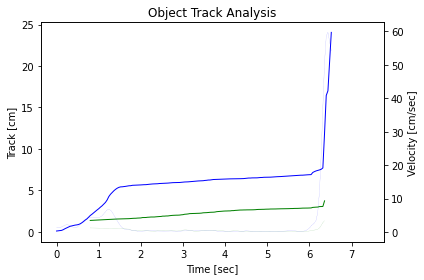

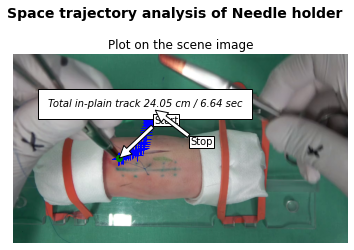

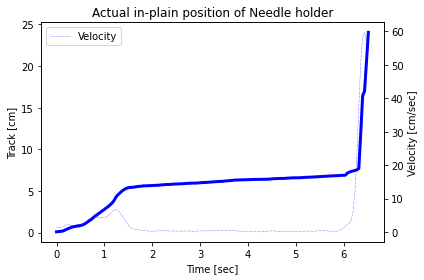

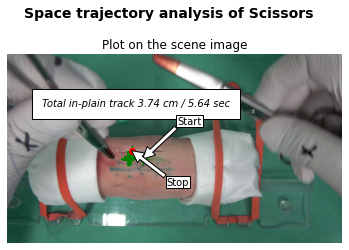

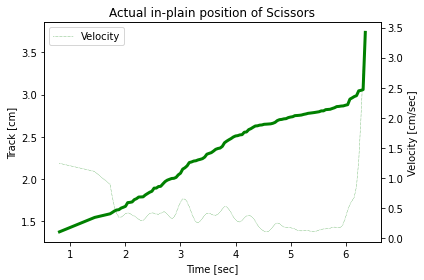

In [15]:

# pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)
pigleg_cv.main_report(str(img_pths[0]),  "./del_test_video_output/")

In [16]:
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

In [17]:
!python /home/appuser/mmdetection/mmdet/utils/collect_env.py

fatal: detected dubious ownership in repository at '/webapps/piglegsurgery'
To add an exception for this directory, call:

	git config --global --add safe.directory /webapps/piglegsurgery
sys.platform: linux
Python: 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:10) [GCC 10.3.0]
CUDA available: True
GPU 0: NVIDIA GeForce GTX 1080 Ti
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.7, V11.7.64
GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 1.12.0a0+8a1a93a
PyTorch compiling details: PyTorch built with:
  - GCC 9.4
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash N/A)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_52,code=sm_52;-gencode;arch=compute_60,cod

In [ ]:
!pwd

In [ ]:
pip list

In [35]:
# !MMCV_WITH_OPS=1 FORCE_CUDA=1 pip install mmcv-full==1.5.2

In [36]:
# !pip uninstall -y mmcv-full